# Exercise 1: Explore CNNs  
## Train the RNN models on Fashion-MNIST dataset.  

In this tutorial, we'll build and train a recurrent neural network to classify images of clothing, like sneakers and shirts. 
This guide uses [tf.keras](https://www.tensorflow.org/beta/guide/keras/overview), a high-level API to build and train models in TensorFlow.


Before running any code, we do the following two steps:
1. Reset the runtime by going to **Runtime -> Reset all runtimes** in the menu above. 
2. Select **GPU** by going to **Runtime -> Change runtime type -> Hardware accelerator** in the menu above. 

## [Install and import dependencies]
Since we need to use the latest tensorflow version, which is Tensorflow 2.0 beta. We need to install it. The default Tensorflow version in Colab is r1.14.0. 

In [10]:
 ## Install tensorflow 2.0.0 beta version (GPU VERSION)
 !pip install tensorflow-gpu==2.0.0-beta1 

In [11]:
from __future__ import absolute_import, division, print_function, unicode_literals


# Import TensorFlow and Fashion-MNIST Datasets
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.0.0-beta1


In [0]:
# To ignore some warning message
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## [Data Loading]  

**Fashion MNIST** has the same data structure as the regular **MNIST** dataset, but it's a slightly more challenging. 


In [0]:
# load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

### Data Preparation  

The value of each pixel in the image data is an integer in the range `[0,255]`. For the model to work properly, these values need to be normalized to the range `[0,1]`. 

In [0]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
# resize and normalize

x_train = np.reshape(x_train, [-1, image_size,image_size])
x_test = np.reshape(x_test, [-1, image_size,image_size])
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [0]:
# compute the number of labels
num_labels = len(np.unique(y_train))
# network parameters
input_shape = (image_size, image_size)
batch_size = 128
units = 256
dropout = 0.2

##[Construct the Model]  
model is RNN with 256 units, input is 28-dim vector 28 timesteps

In [0]:
model = models.Sequential(name = 'rnn')    
model.add(layers.SimpleRNN(256, dropout = 0.2, 
                   input_shape=input_shape))
model.add(layers.Dense(10, activation='softmax'))

In [18]:
model.summary()

Model: "rnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 256)               72960     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________


### Compile the model

Before the model is ready for training, it needs a few more settings. 

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

##[Train the Model]  

In [20]:
EPOCHS=20
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), 
                    epochs=EPOCHS, batch_size=batch_size)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 33s 543us/sample - loss: 0.7540 - accuracy: 0.7248 - val_loss: 0.6022 - val_accuracy: 0.7798
Epoch 2/20
60000/60000 [==============================] - 32s 534us/sample - loss: 0.5779 - accuracy: 0.7893 - val_loss: 0.4944 - val_accuracy: 0.8183
Epoch 3/20
60000/60000 [==============================] - 32s 533us/sample - loss: 0.5346 - accuracy: 0.8073 - val_loss: 0.5091 - val_accuracy: 0.8148
Epoch 4/20
60000/60000 [==============================] - 32s 528us/sample - loss: 0.4985 - accuracy: 0.8173 - val_loss: 0.4958 - val_accuracy: 0.8229
Epoch 5/20
60000/60000 [==============================] - 32s 528us/sample - loss: 0.4834 - accuracy: 0.8244 - val_loss: 0.4519 - val_accuracy: 0.8347
Epoch 6/20
60000/60000 [==============================] - 32s 532us/sample - loss: 0.4728 - accuracy: 0.8263 - val_loss: 0.4447 - val_accuracy: 0.8369
Epoch 7/20
60000/60000 [====================

### Visualize the training process   
Here, we visualize the training process to have a better understanding of our model.
To see the performance of our model, and get some insights on how to tune our model for better performance.

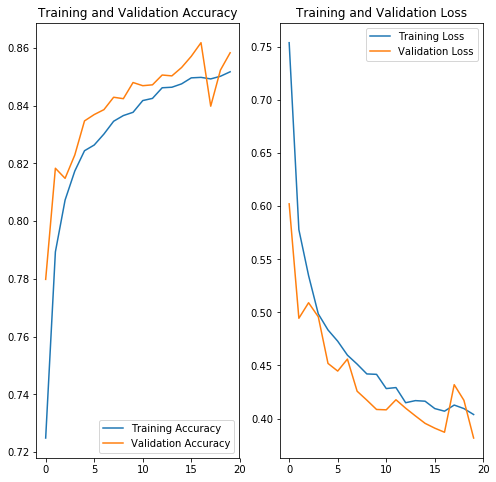

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./cnn.png')
plt.show()

##[Evaluate the Model] 

In [24]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

10000/10000 [==============================] - 2s 196us/sample - loss: 0.3817 - accuracy: 0.8583

Test accuracy: 85.8%
